In [53]:
"""
Machine Learning Project
Credit Card Fraud Detection using Machine Learning with Python



About Dataset
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.
Unfortunately, due to confidentiality issues,   the original features and more background information cannot be provided about the data.
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


Dataset link  https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
P.S. Kaggle notebook is used
"""

"\nMachine Learning Project\nCredit Card Fraud Detection using Machine Learning with Python\n\n\n\nAbout Dataset\nContext\nIt is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.\n\nContent\nThe dataset contains transactions made by credit cards in September 2013 by European cardholders.\nThis dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.\nThe dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.\n\nIt contains only numerical input variables which are the result of a PCA transformation.\nUnfortunately, due to confidentiality issues,   the original features and more background information cannot be provided about the data.\nFeatures V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' an

In [30]:
#Importing Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
#Load and Print Data 
credit_card_data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [54]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
#Checking for a missing value
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [35]:
#Distribution of legit & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [36]:
"""
This dataset is highly unbalanced 
1 means fraudulent transactions (in class colums)
0 means Normla transactions (in class column)

"""


'\nThis dataset is highly unbalanced \n1 means fraudulent transactions (in class colums)\n0 means Normla transactions (in class column)\n\n'

In [37]:
# Separating data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class  == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [38]:
#Statistical measures of data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [39]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [40]:
#Compare values for both transactions
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [41]:
"""
Build a sample dataset containing similar distribution of normal and fraudulenet transactions
Number of Fraudulent transactions  -> 492
Since data is unbalanced we take a sample from legit data 
"""

legit_sample = legit.sample(n= 492)

In [42]:
# Concatenating data frames

new_dataset = pd.concat([legit_sample, fraud], axis = 0) # axis = 0 means add by rows
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192217,129594.0,1.906354,-0.586714,-0.755702,0.380484,-0.255769,0.123623,-0.496864,0.070218,1.153418,...,-0.218644,-0.733785,0.301340,0.051115,-0.505905,-0.020849,-0.034825,-0.026620,79.99,0
16365,27749.0,1.078802,0.124650,0.703544,1.089854,-0.297026,0.077297,-0.213624,0.161700,-0.150889,...,0.016995,0.013415,0.027487,0.005235,0.305043,-0.469624,0.042790,0.022612,29.00,0
9159,13072.0,1.154236,0.035176,1.413865,1.552929,-0.962668,-0.167614,-0.694028,0.045538,2.270075,...,-0.219628,-0.210481,0.014487,0.318091,0.370658,-0.445858,0.041580,0.030711,9.99,0
180604,124614.0,1.258876,-1.535395,-2.130060,0.729176,1.755424,4.281783,-0.432305,0.993927,0.983074,...,-0.319044,-1.516092,0.175713,0.634045,-0.407785,-1.120930,0.009201,0.022894,350.35,0
217199,140803.0,-0.920435,0.987817,-0.063312,1.119036,2.044779,-0.616767,1.373498,-0.198479,-1.203047,...,0.035964,0.022339,-0.419376,0.421122,1.222767,-0.209164,0.025969,0.102848,56.29,0


In [43]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [44]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94982.914634,-0.105547,-0.020554,0.010139,-0.081133,0.254722,0.106337,0.064374,0.033234,-0.024544,...,0.013807,0.026295,-0.033340,0.011910,0.00726,0.042292,-0.006267,-0.015485,-0.014773,81.999472
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [45]:
# Splitting data to Features and Target (Target is class(zero and one))
X = new_dataset.drop(columns = 'Class', axis =1 ) # axis = 1 means column
Y = new_dataset['Class'] # target

In [46]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
192217  129594.0  1.906354 -0.586714 -0.755702  0.380484 -0.255769  0.123623   
16365    27749.0  1.078802  0.124650  0.703544  1.089854 -0.297026  0.077297   
9159     13072.0  1.154236  0.035176  1.413865  1.552929 -0.962668 -0.167614   
180604  124614.0  1.258876 -1.535395 -2.130060  0.729176  1.755424  4.281783   
217199  140803.0 -0.920435  0.987817 -0.063312  1.119036  2.044779 -0.616767   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [47]:
print(Y)

192217    0
16365     0
9159      0
180604    0
217199    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [48]:
#Split data into training and test parts
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state =2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [75]:
#Model training
# Logistics Regression, because it is usually used for binary classification

model = LogisticRegression()

model.fit(X_train, Y_train)



LogisticRegression()

In [76]:
# Model evaluation
# New model , RandomForest and other evaluations (metrics)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score



 
# Predictions

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class

# Metrics

accuracy= accuracy_score(Y_test, y_pred)  # Accuracy tells you how often the model correctly classifies transactions (both fraud and non-fraud).

precision = precision_score(Y_test, y_pred) # Precision is the percentage of transactions that were predicted as fraud (positive) that are actually fraud.

recall = recall_score(Y_test, y_pred) #  Recall tells you how many of the actual fraud cases the model was able to identify.

f1 = f1_score(Y_test, y_pred) # F1-Score is the harmonic mean of Precision and Recall, providing a balance between them.


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1_score: {f1:.2f}")



Accuracy: 0.91
Precision: 0.93
Recall: 0.88
F1_score: 0.91


In [77]:
from sklearn.metrics import precision_recall_curve, auc

probs = model.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1 (fraud)
precision2, recall2, _ = precision_recall_curve(Y_test, probs)
auprc = auc(recall2, precision2)
print(f"AUPRC: {auprc}")


AUPRC: 0.9825900757209491


In [78]:
# Check the distribution of the target variable
print(Y_train.value_counts())


Class
1    394
0    393
Name: count, dtype: int64


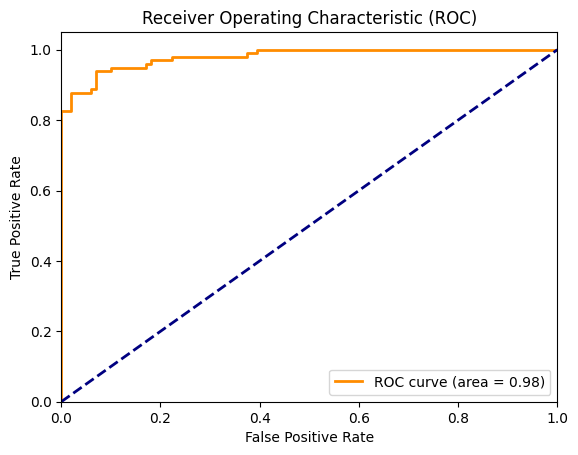

ROC-AUC: 0.9800041228612657


In [79]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = roc_auc_score(Y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"ROC-AUC: {roc_auc}")
